In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from mintpy.utils import readfile
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/data/archives/Kirishima/DEM')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/data/archives/Kirishima/DEM


In [5]:
# read data
srtm_geoid_file = os.path.join(work_dir, 'srtm30m.dem')
srtm_ellip_file = os.path.join(work_dir, 'srtm30m.dem.wgs84')
gsi1_file       = os.path.join(work_dir, 'gsi10m.dem.wgs84')
dem_srtm_geoid = readfile.read(srtm_geoid_file)[0].astype(np.float32)
dem_srtm_ellip = readfile.read(srtm_ellip_file)[0].astype(np.float32)
dem_gsi1       = readfile.read(gsi1_file)[0].astype(np.float32)

# resample GSI DEHM to the same resolution as the SRTM
dem_gsi3 = resize(dem_gsi1, dem_srtm_ellip.shape, order=1, mode='constant', anti_aliasing=True, preserve_range=True)
# mask out pixels on the water
water_body = dem_gsi3 == 0
dem_gsi3[water_body] = np.nan
dem_srtm_geoid[water_body] = np.nan
dem_srtm_ellip[water_body] = np.nan

save figure to file /Users/yunjunz/data/archives/Kirishima/DEM/hist_DEHM_vs_SRTM.png


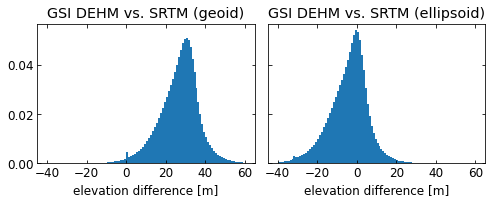

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[7, 3], sharey=True)
axs[0].hist((dem_gsi3 - dem_srtm_geoid).flatten(), bins=100, range=(-40, 60), density=True)
axs[1].hist((dem_gsi3 - dem_srtm_ellip).flatten(), bins=100, range=(-40, 60), density=True)

# axis format
for ax, title in zip(axs, ['GSI DEHM vs. SRTM (geoid)', 'GSI DEHM vs. SRTM (ellipsoid)']):
    ax.tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
    ax.set_xlabel('elevation difference [m]')
    ax.set_title(title)

fig.tight_layout()

# output
out_fig = os.path.abspath('hist_DEHM_vs_SRTM.png')
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
print('save figure to file', out_fig)
plt.show()